## Draw figures about results of smaller data experiments

In [1]:
import re
from pandas import DataFrame as df
from pandas import read_csv
import pandas
from plotnine import ggplot, geom_point, aes, geom_line
from plotnine import geom_abline, geom_hline, ggtitle, theme, theme_bw

In [2]:
df = read_csv('edt_2.6/results_smaller_data.csv') \
      .rename(columns={'LAS_test': 'test LAS'}) \
      .rename(columns={'LAS_train': 'train LAS'}) \
      .drop(['LAS_gap', 'UAS_test', 'UAS_train'], axis=1)

In [3]:
pandas.set_option('display.max_colwidth', None)
df

,experiment,test LAS,train LAS,test_words,train_words
0,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_010,0.6864,0.9491,48491,39886
1,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_020,0.7490,0.9636,48491,77759
2,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_030,0.7819,0.9365,48491,117642
3,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_040,0.7989,0.9366,48491,157491
4,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_050,0.8152,0.9234,48491,195477
5,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_060,0.8250,0.9299,48491,235468
6,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_070,0.8241,0.9179,48491,273422
7,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_080,0.8327,0.9194,48491,311383
8,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_090,0.8343,0.9151,48491,349322
9,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_100,0.8377,0.9104,48491,389278


In [4]:
df.loc[:, 'model'] = df.apply(lambda x: x['experiment'].replace('eval_stanza_morph_extended_smaller_data_', 'stanza_ME_'), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'_[0-9]+$','',x['model']), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'_09_only_pos_feats$','',x['model']), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'_08','',x['model']), axis=1)
# Rename models
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'stanza_ME_01_only_wordforms','stanza ME only wordforms',x['model']), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'stanza_ME_02_keep_all',      'stanza ME all features',x['model']), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'stanza_ME_03_only_pos_feats','stanza ME only postags and feats',x['model']), axis=1)
df.loc[:, 'training size']  = df.apply(lambda x: int((x['experiment'].split('_')[-1]).lstrip('0')), axis=1) 
df = df.drop(['experiment'], axis=1)
# Normalize LAS scores
df['test LAS']  = df['test LAS'].multiply(100.0)
df['train LAS'] = df['train LAS'].multiply(100.0)
df

,test LAS,train LAS,test_words,train_words,model,training size
0,68.64,94.91,48491,39886,stanza ME only wordforms,10
1,74.90,96.36,48491,77759,stanza ME only wordforms,20
2,78.19,93.65,48491,117642,stanza ME only wordforms,30
3,79.89,93.66,48491,157491,stanza ME only wordforms,40
4,81.52,92.34,48491,195477,stanza ME only wordforms,50
5,82.50,92.99,48491,235468,stanza ME only wordforms,60
6,82.41,91.79,48491,273422,stanza ME only wordforms,70
7,83.27,91.94,48491,311383,stanza ME only wordforms,80
8,83.43,91.51,48491,349322,stanza ME only wordforms,90
9,83.77,91.04,48491,389278,stanza ME only wordforms,100


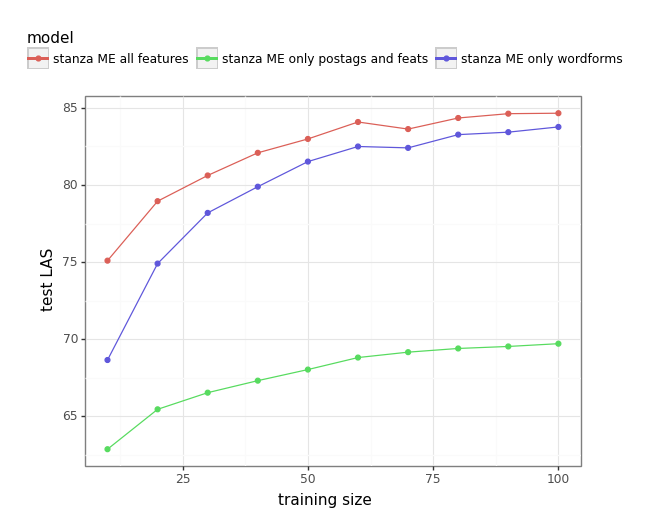

<ggplot: (185120517569)>

C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 10 x 8 in image.
C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figure_1_test.pdf


In [5]:
p = ggplot(df) + theme_bw() + geom_point(aes(x='training size', y='test LAS', color='model'))
p = p + geom_line(aes(x='training size', y='test LAS', color='model')) + theme(legend_position='top')
display(p)
p.save('figure_1_test.pdf', height=8, width=10)

In [6]:
# Separate test and train for results visualization
train_df = df.drop(['test LAS'], axis=1)
train_df.loc[:, 'eval set'] = df.apply(lambda x: 'train', axis=1)
train_df = train_df.rename(columns={'train LAS': 'LAS'})
test_df = df.drop(['train LAS'], axis=1)
test_df.loc[:, 'eval set'] = df.apply(lambda x: 'test', axis=1)
test_df = test_df.rename(columns={'test LAS': 'LAS'})
#joint_df = pandas.concat([train_df, test_df])

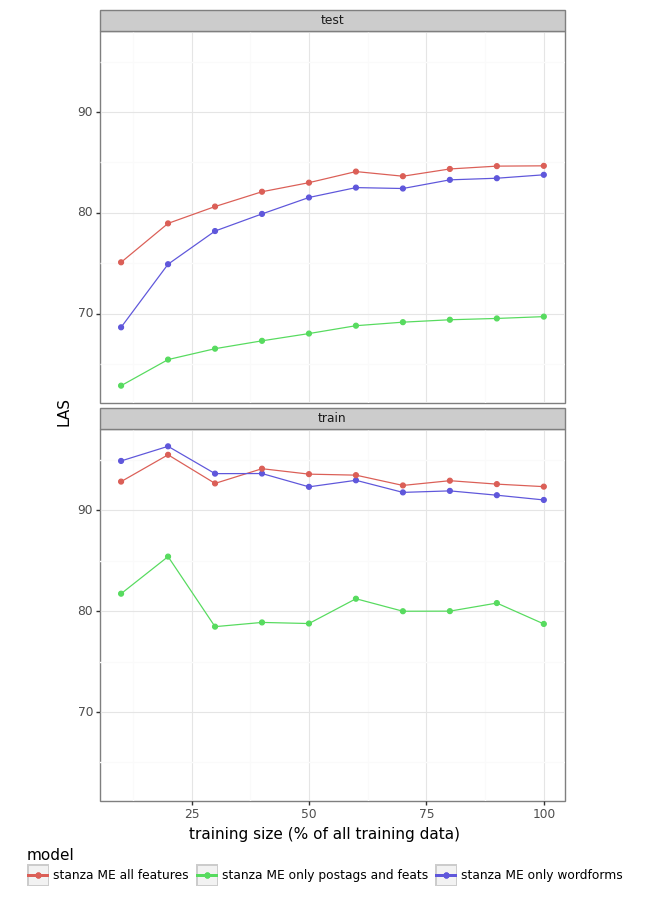

<ggplot: (185120650192)>

C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6 x 10 in image.
C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figure_1_train_and_test.pdf


In [7]:
# Test and training set performance as a function of training set size (%)
from plotnine import labs, facet_wrap
p = ggplot(train_df) + theme_bw()
p = p + labs(x='training size (% of all training data)')
p = p + geom_point(train_df, aes(x='training size', y='LAS', color='model'))
p = p + geom_line(train_df, aes(x='training size', y='LAS', color='model'))
p = p + geom_point(test_df, aes(x='training size', y='LAS', color='model'))
p = p + geom_line(test_df, aes(x='training size', y='LAS', color='model'))
p = p + theme(legend_position='bottom', figure_size=(6, 10), legend_box_spacing=.25) + facet_wrap(['eval set'], ncol=1)
display(p)
p.save('figure_1_train_and_test.pdf')

## Extrapolation of test and training errors

* We use the range 70% - 100% for the extrapolation
* We use linear regression to find the linear trend



stanza ME only wordforms
Test fit: 0.04239999999999965 * x + 79.61600000000003
Train fit: -0.02680000000000035 * x + 93.84800000000003
Improvement rate 108.92
Min stablisation size: 205.66% 800608
Limiting training error: 8833.62%


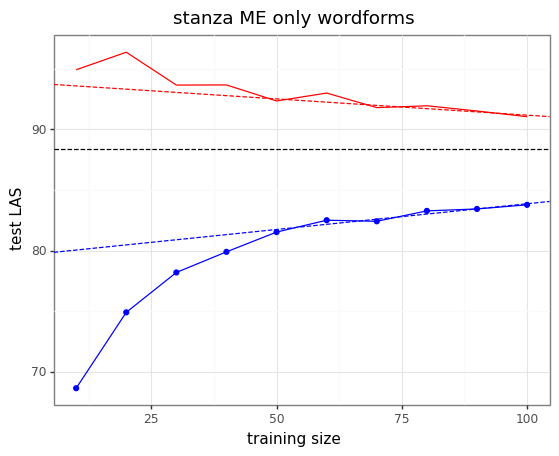

<ggplot: (185123297786)>

stanza ME all features
Test fit: 0.03369999999999961 * x + 81.45300000000003
Train fit: -0.006999999999999744 * x + 93.195
Improvement rate 86.57
Min stablisation size: 288.50% 1123072
Limiting training error: 9117.55%


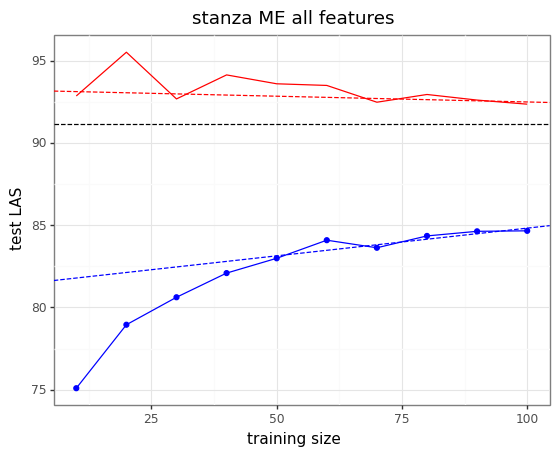

<ggplot: (185123125495)>

stanza ME only postags and feats
Test fit: 0.017799999999999584 * x + 67.92700000000004
Train fit: -0.029800000000000177 * x + 82.42300000000002
Improvement rate 45.73
Min stablisation size: 304.54% 1185499
Limiting training error: 7334.78%


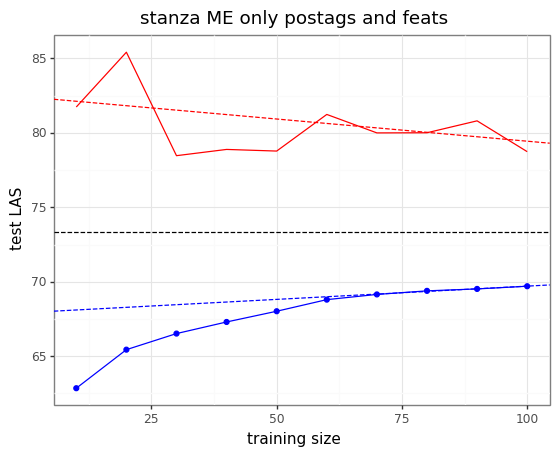

<ggplot: (185123338033)>

In [8]:
from sklearn.linear_model import LinearRegression

#
#  (A) this is training set size if we ignore punctuation 
#      tokens while calculating LAS scores.
#
tr_size = 325531

#
#  (B) this is training set size if we include punctuation 
#      tokens while calculating LAS scores.
#
tr_size = 389278

lm = LinearRegression()
for model in df['model'].unique():

    print(model)
    data = df.set_index('model').loc[model]

    # Test
    X = data.loc[data['training size']>=70, ['training size']]
    y = data.loc[data['training size']>=70, 'test LAS']
    lm.fit(X,y) 
    a = lm.coef_[0]
    b = lm.intercept_
    print('Test fit: {} * x + {}'.format(a, b))

    X = data.loc[data['training size']>=70, ['training size']]
    y = data.loc[data['training size']>=70, 'train LAS']
    lm.fit(X,y) 
    c = lm.coef_[0]
    d = lm.intercept_
    print('Train fit: {} * x + {}'.format(c, d))

    print('Improvement rate {:.2f}'.format((100 * a) * (100000/tr_size * 100)) )

    e = (d-b)/(a-c)
    lim_las = (a * e + b)
    print('Min stablisation size: {:.2f}% {:.0f}'.format(e, e * tr_size / 100))
    print('Limiting training error: {:.2f}%'.format(100 * lim_las)) 

    p = ggplot(data) + theme_bw() + geom_point(aes(x='training size', y='test LAS'), color='blue')
    p = p + geom_line(aes(x='training size', y='test LAS'), color = 'blue')
    p = p + geom_line(aes(x='training size', y='train LAS'), color='red')
    p = p + geom_abline(intercept=b, slope=a, linetype='dashed', color = 'blue')
    p = p + geom_abline(intercept=d, slope=c, linetype='dashed', color = 'red')
    p = p + geom_hline(yintercept=lim_las, linetype='dashed')
    p = p + ggtitle(model)
    display(p)